# Toy dataset with two coupled invariant pairs [(x, y), (x, z)]
Function: $f(x_1,x_2,x_3,x_4) = \left(x_1^4 \cdot x_2^3 \right) + \log(5 x_1^2 \cdot x_3) + \sqrt{x_4^3}$

True invariant combination:
- $[u, v] = \left[ x_1^4 \cdot x_2^3, x_1^2 \cdot x_3 \right]$ (normalized exponents $\alpha=0.8, \, \beta=0.6, \, \gamma=0.894, \, \delta=0.447$)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from Regression.dataset import InvarianceDataset
from Regression.model import InvarianceModel
from Regression.detector import InvarianceDetector

warnings.filterwarnings("ignore", category=DeprecationWarning)

## Creates a noisy dataset and saves it.

In [2]:
# reproducibility
np.random.seed(0)

def f_fun(x_1, x_2, x_3, x_4):
    return x_1**4 * x_2**3 + np.log(5 * x_1**2 * x_3) + np.sqrt(x_4**3)

In [3]:
# sampling
N = 8000
x = np.random.uniform(1.0, 2.0, size=N)
y = np.random.uniform(0.5, 1.0, size=N)
z = np.random.uniform(2.0, 5.0, size=N)
w = np.random.uniform(3.0, 7.0, size=N)

# noiseless target
f_clean = f_fun(x, y, z, w)

In [4]:
# add additive Gaussian noise scaled to a fraction of the std of f
noise_frac = 0.05   # 10% of std(f)
noise = np.random.normal(0.00, noise_frac * np.std(f_clean), size=N)
f_noisy = f_clean + noise

In [5]:
# build dataframe and include the true invariant for diagnostics
df = pd.DataFrame({
    "x": x,
    "y": y,
    "z": z,
    "w": w,
    "f": f_noisy
})

print(f"Dataset has N = {N}, noise_frac = {noise_frac} (i.e. {noise_frac*100:.1f}% of std(f)).")

Dataset has N = 8000, noise_frac = 0.05 (i.e. 5.0% of std(f)).


### Save dataset if first time creating it

In [6]:
dataset = InvarianceDataset(df, "f")

In [7]:
# save files for use in notebooks / examples
csv_path = "../../Data/toy_coupled_pairs_dataset.csv"
xlsx_path = "../../Data/toy_coupled_pairs_dataset.xlsx"
try:
    dataset.to_excel(xlsx_path)
except Exception:   
    # openpyxl might not be installed in some environments — ignore if save to excel fails
    xlsx_path = None
    dataset.to_csv(csv_path)

### Read dataset if already saved

In [8]:
csv_path = "../../Data/toy_coupled_pairs_dataset.csv"
xlsx_path = "../../Data/toy_coupled_pairs_dataset.xlsx"
try:
    dataset = InvarianceDataset.from_excel(xlsx_path, 'f')
except Exception:   
    # openpyxl might not be installed in some environments — ignore if save to excel fails
    xlsx_path = None
    dataset = InvarianceDataset.from_csv(csv_path, 'f')

In [9]:
# show a quick summary and the head of the dataframe
print("\nDataFrame summary (first 5 rows):\n")
print(dataset.head())

# show descriptive statistics
print("\nDescriptive statistics:\n")
print(dataset.summary())


DataFrame summary (first 5 rows):

          x         y         z         w          f
0  1.548814  0.728880  3.186612  3.612785  12.387090
1  1.715189  0.688459  4.532052  3.131246  12.249720
2  1.602763  0.851168  2.451325  3.915181  14.852398
3  1.544883  0.603662  2.918928  4.996986  15.629648
4  1.423655  0.537140  2.283711  4.181557  11.983243

Descriptive statistics:

                 x            y            z            w            f
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000
mean      1.495549     0.746348     3.502402     4.999200    17.856110
std       0.289739     0.144385     0.878310     1.155851     4.944873
min       1.000072     0.500083     2.000692     3.001380     7.790285
25%       1.244534     0.622234     2.734352     3.988040    13.979841
50%       1.492803     0.744100     3.512538     5.012222    17.585684
75%       1.747077     0.872502     4.271929     5.995204    21.185017
max       1.999964     0.999989     4.999566     6.9

## DNN model

In [10]:
X_train, X_test, y_train, y_test = dataset.train_test_split()

In [11]:
# Initialize the DNN model
model = InvarianceModel(input_dim=4)

In [12]:
# Build and compile the DNN model
model.build_and_compile(X_train)

### Train the model if not saved already

In [13]:
# Train the model
checkpoint_filepath = './tmp/checkpoint_toy_coupled_pairs.weights.h5'
model_filepath = './tmp/checkpoint_toy_coupled_pairs.keras'
model.train(X_train, y_train, checkpoint_path=checkpoint_filepath, model_path=model_filepath)

Epoch 1/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.6250 - val_loss: 1.8300
Epoch 2/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4144 - val_loss: 1.1644
Epoch 3/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8086 - val_loss: 0.5541
Epoch 4/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4341 - val_loss: 0.4189
Epoch 5/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3125 - val_loss: 0.2754
Epoch 6/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2783 - val_loss: 0.2892
Epoch 7/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2686 - val_loss: 0.2512
Epoch 8/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2584 - val_loss: 0.2982
Epoch 9/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2627 - val_loss: 0.2511
Epoch 10/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2521 - val_loss: 0.3101
Epoch 11/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2538 - val_loss: 0.2460
Epoch 12/200
181/181 ━━━━━━━━━━━━━━━━━━━━

In [14]:
# Save training history
history_filepath = './tmp/checkpoint_toy_coupled_pairs.pkl'
model.save_history(history_filepath)

### Otherwise, load trained model

In [15]:
# Reload model and history
history_filepath = './tmp/checkpoint_toy_coupled_pairs.pkl'
history = model.load_history(history_filepath)

model_filepath = './tmp/checkpoint_toy_coupled_pairs.keras'
model.load_model(model_filepath)

### Model metrics

In [16]:
# Evaluate on test set
r2, mae, rmse = model.evaluate(X_test, y_test)

print(f"R² = {r2:.3f}")
print(f"MAE = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R² = 0.997
MAE = 0.216
RMSE = 0.271


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


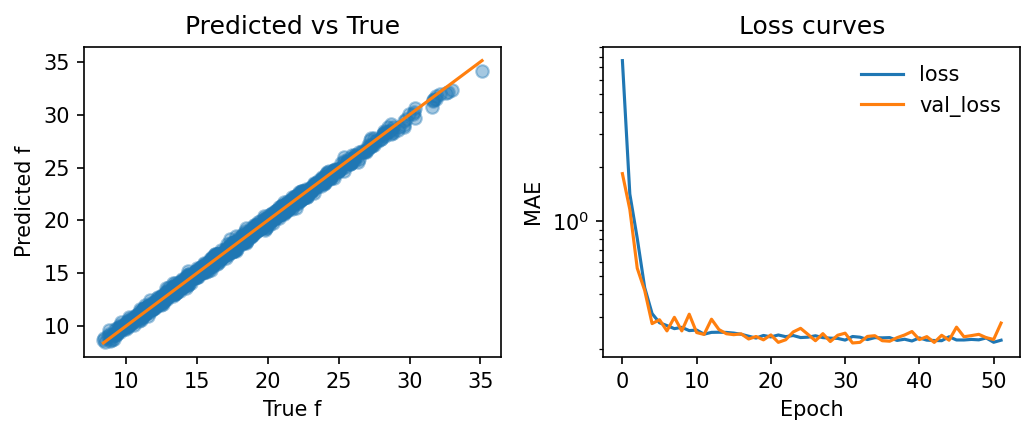

In [17]:
delta = max(y_test) - min(y_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), dpi=150)
test_predictions = model.predict(X_test)

# Scatter predicted vs true
ax1.scatter(y_test, test_predictions, alpha=0.4)
p1 = max(max(test_predictions), max(y_test))
p2 = min(min(test_predictions), min(y_test))
ax1.plot([p1, p2], [p1, p2], "C1")
ax1.annotate(f"$R^2$ = {r2:.3f}", xy=(0.02 * delta, 0.95 * delta))
ax1.annotate(f"MAE = {mae:.2f}", xy=(0.02 * delta, 0.85 * delta))
ax1.annotate(f"RMSE = {rmse:.2f}", xy=(0.02 * delta, 0.75 * delta))
ax1.set_xlabel("True f")
ax1.set_ylabel("Predicted f")
ax1.set_title("Predicted vs True")

# Loss curves
ax2.plot(history['loss'], label='loss')
ax2.plot(history['val_loss'], label='val_loss')
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.legend(frameon=False)
ax2.set_title("Loss curves")

plt.tight_layout()
plt.show()

## Invariance detection
This section performs feature grouping analysis using combinations of two features.

The analysis aims to detect invariant groups of features in the form $x_i^{\alpha_1} x_j^{\alpha_2}$.

In [18]:
# Load the pre-trained model
model = InvarianceModel(input_dim=4)
model_filepath = './tmp/checkpoint_toy_coupled_pairs.keras'
model.load_model(model_filepath)

In [19]:
# List of features
feature_names = dataset.feature_names
feature_names

['x', 'y', 'z', 'w']

In [20]:
detector = InvarianceDetector()

This is a bit more susceptible to the initial guess. If they are far from the true values, then the protocol may not recover the real exponents/coefficients. However, it may still find a "local" invariance!

In [21]:
res = detector.find_invariant_coupled_pairs(dataset, model, [0.5, 0.5, 0.5, 0.5], mode='product')

100%|██████████| 12/12 [02:56<00:00, 14.68s/it]


In [22]:
print(res)

        coupled_pair    mean_a     std_a    mean_b     std_b    mean_c  \
0   ((x, y), (x, z))  0.791304  0.044859  0.606675  0.061412  0.926993   
1   ((x, y), (x, w))  0.503483  0.090588  0.857087  0.060830  0.424086   
2   ((x, y), (y, z))  0.901594  0.060367  0.257522  0.342297  0.902888   
3   ((x, y), (y, w))  0.975747  0.031869 -0.169260  0.135106  0.500494   
4   ((x, z), (x, w))  0.920170  0.040081  0.367982  0.127556  0.364144   
5   [(x, z), (z, y)]  0.993290  0.016391  0.029372  0.110651  0.190102   
6   ((x, z), (z, w))  0.973107  0.011573 -0.221036  0.063816  0.222122   
7   [(x, w), (w, y)]  0.637522  0.306728  0.650079  0.277273  0.552657   
8   [(x, w), (w, z)]  0.636184  0.195032  0.723641  0.183236  0.959648   
9   ((y, z), (y, w))  0.937034  0.029631  0.331173  0.106837  0.227139   
10  ((y, z), (z, w))  0.997845  0.000783 -0.062584  0.019714  0.084705   
11  [(y, w), (w, z)]  0.497614  0.107249  0.857994  0.068729  0.980061   

       std_c    mean_d     std_d  
0 